exp:  RNA
replicates combined
booean is  True  :cpm normalization
exp:  ATAC
replicates combined
booean is  True  :cpm normalization
     RNA_Sham   RNA_TAC  RNA_JQ1_w   RNA_JQ1  ATAC_Sham  ATAC_TAC  ATAC_JQ1_w  \
0    8.832232  8.414530   8.715987  8.451400   7.041158  7.057085    7.227832   
1    5.166341  5.366002   4.997788  5.145179   6.432413  6.911021    6.718007   
2    4.896189  2.518584   5.392873  2.647822   7.154971  7.418971    7.370283   
3    5.756849  5.670153   5.875372  6.178329   8.142835  8.023921    8.149364   
4    3.079463  3.842545   3.114611  4.058154   7.136518  7.131812    7.253190   
..        ...       ...        ...       ...        ...       ...         ...   
465  2.598833  3.170610   3.607519  2.917644   7.263650  7.420910    7.315124   
466  7.677242  6.757664   7.083414  7.206615   7.657370  7.483340    7.574655   
467  4.270240  5.329807   5.195022  4.482870   7.561593  7.472206    7.695749   
468  2.867750  3.447742   5.154431  5.092850   7.288139  

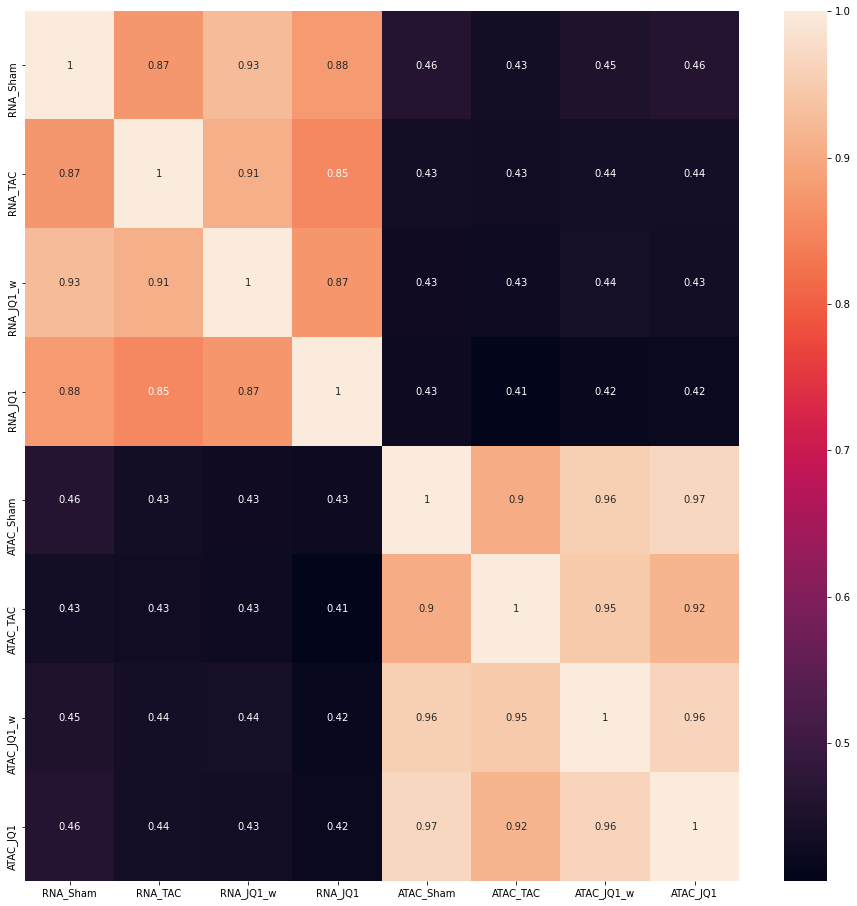

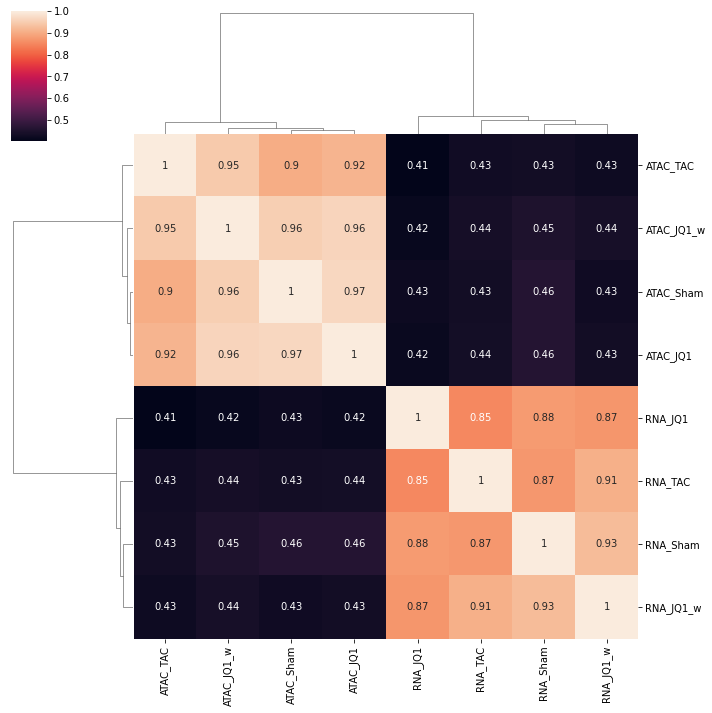

In [15]:
import data_science as ds 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
        
#wd = /pollard/home/smorin/Pollard-Lab
#data stored in : /pollard/data/projects/morin/Counts/

   
#----------------MAIN PROGRAM
rel_path = "../../../data/projects/morin/Counts/"
#store data in dictionary using key:sample, value: log(count+1) for CPM normalization
#and value: (log(count+1), length) for CPKM normalization


#retrieve samples from specified experiment
#experimental data
# exp = "RNA"
cpm_bool = False #False: normalize by cpkm, True: normalize by cpm
repl_bool = True #True:use sum of replicates, False: use r1, r2

#file holding 16 sample names
#8 samples per experiment 
samples_dir = "../../../data/projects/morin/Samples_Dir"


#normalize rna data
rnaDict= ds.run_ds_on_exp(samples_dir, rel_path, "RNA", cpm_bool, repl_bool)
# print(rnaDict)

#normalize atac data
atacDict= ds.run_ds_on_exp(samples_dir, rel_path, "ATAC", cpm_bool, repl_bool)

# print(atacDict)
#merge dictionaries
mergeDict = {}
if repl_bool:
    #make 8x8 matrix with replicates combined
    for key, values in rnaDict.items():
        mergeDict[key] = values
    for k, v in atacDict.items():
        mergeDict[k] = v
else:
    #make 16x16 matrix with replicates separate
    for key, values in rnaDict.items():
        mergeDict['r'+key] = values
    for k, v in atacDict.items():
        mergeDict['a'+k] = v
# print(mergeDict.keys())

#create dataframe 
df = pd.DataFrame(data=mergeDict)

print(df)  
    

# #not necessarily sequential analysis
# #-----------------Analysis part 1: Violin and Swarmplot--------------------
# #create figure objects 
# violin = sns.violinplot(data=df, inner = None)
# swarmplot = sns.swarmplot(data=df,color="black", edgecolor="gray", size=2)

# #get figure and save figure
# norm = '' 
# if cpm_bool == True:
#     norm = "CPM"
# else:
#     norm = "CPKM"
# img_format = '.png'
# figure1 = "violin_swarmplot"
# filename1 = figure1 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# # fig1 = swarmplot.get_figure()
# # fig1.savefig(filename1)


# #-----------------Analysis part 2: Heatmap and Clustermap------------------
#create correlation matrix using the pearson correlation coefficient
corr_matrix = df.corr(method = 'pearson')
print(corr_matrix)

plt.figure(figsize=(16,16))
heatmap = sns.heatmap(corr_matrix, annot=True)
cluster = sns.clustermap(corr_matrix, annot=True)

# figure2 = "heatmap"
# filename2 = figure2 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# fig2 = heatmap.get_figure()
# fig2.savefig(filename2,bbox_inches='tight')

# figure3 = "clustermap"
# filename3 = figure3 + '_' + exp + '_' + "samples" + '_' + norm + img_format
# cluster.savefig(filename3)


In [1]:
#need to run correlation analysis and compare matrices with this analysis to validate pipeline, 
#then also have to test with combining replicates



(3.716164567606819, 4.034704415820318, 3.9626230261235436, 4.488540765512066)